# Advanced ML

## Coin Toss Example

In [1]:
import numpy as np
from scipy import stats
import pymc3 as pm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\apps\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.8


### Data

In [3]:
n = 10 #trials
h = 4  #number of heads

### Subjective Prior

Here the likelihood is binomial with a beta (1,1) prior.

In [4]:
#beta distribution
alpha = 30 
beta = 30  

#draws
draws = 500

with pm.Model() as model: # context management
    # define priors
    p = pm.Beta('p', alpha=alpha, beta=beta)

    # define likelihood
    y = pm.Binomial('y', n=n, p=p, observed=h)
    
    #inference
    trace = pm.sample(draws=draws, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains, 0 divergences: 100%|████████████████████████████████████████| 4000/4000 [00:12<00:00, 311.85draws/s]


In [5]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p,0.483,0.057,0.376,0.587,0.002,0.001,768.0,768.0,772.0,1468.0,1.0


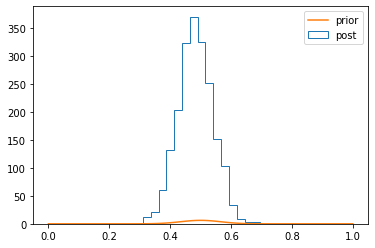

In [6]:
plt.hist(trace['p'], 15, histtype='step', label='post');
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
plt.legend(loc='best');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000165AC100F08>,
      dtype=object)

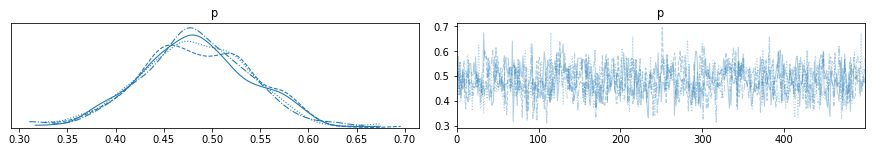

In [7]:
pm.plots.traceplot(trace)

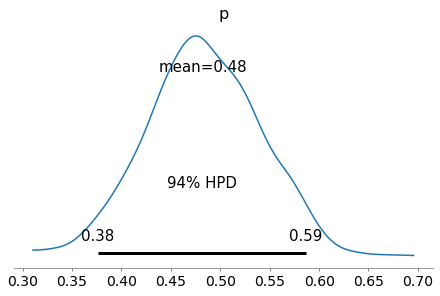

In [8]:
pm.plot_posterior(trace);

### Objective Prior

#### Exercise: Run Bayesian inference using a non-informative prior

1) Use a binomial likelihood  with a beta (1,1) prior.

2) Use a binomial likelihood  with a uniform (0,1) prior.